dewjncweknc clwenkwe

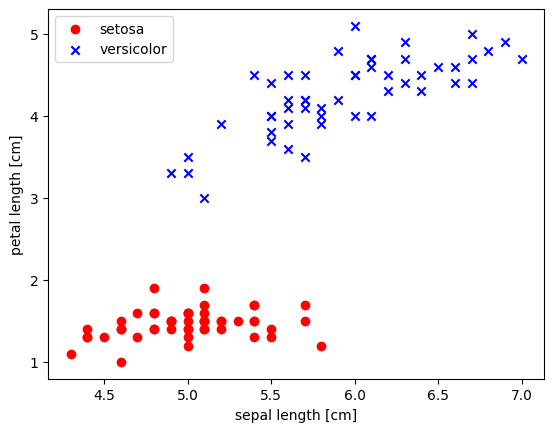

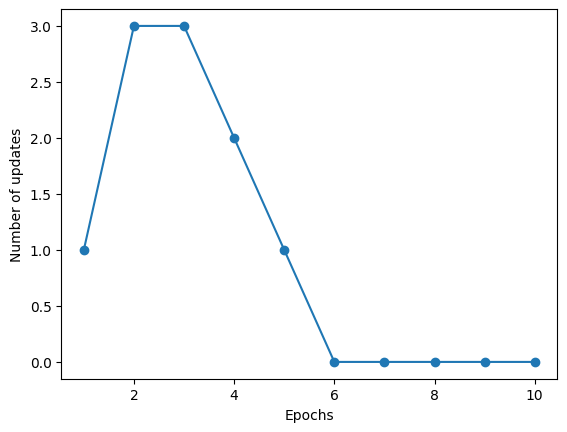

In [64]:
import numpy as np

class Perceptron(object):
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


import os
import pandas as pd

# Load Iris dataset from UCI repository, YOU WOULD NEED TO CHANGE THE PATH
s = '/Users/morganwaddington/Documents/Tandon/Classes/Machine-Learning/iris.data'
df = pd.read_csv(s, header=None, encoding='utf-8')



from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Select Setosa and Versicolor (binary classification)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# Extract (0)sepal length, (1)sepal width, (2)petal length, (3)petal width
X = df.iloc[0:100, [0,2]].values

# Plot the data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()


# Train the Perceptron on the Iris dataset
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

# Plot misclassification errors over epochs
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()



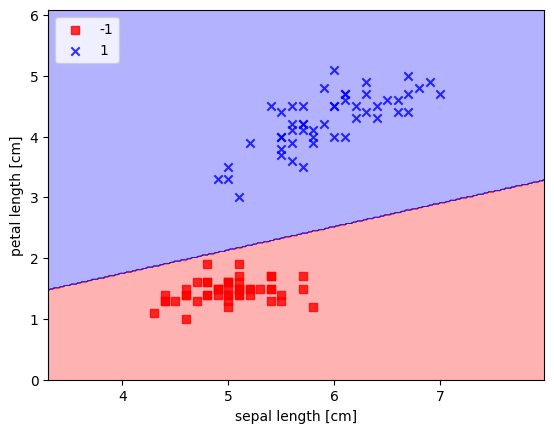

In [65]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
         plt.scatter(x=X[y == cl, 0], 
                     y=X[y == cl, 1], 
                     alpha=0.8, 
                     c=colors[idx],
                     marker=markers[idx], 
                     label=cl, 
                     facecolor='black')

# Plotting the decision regions
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()


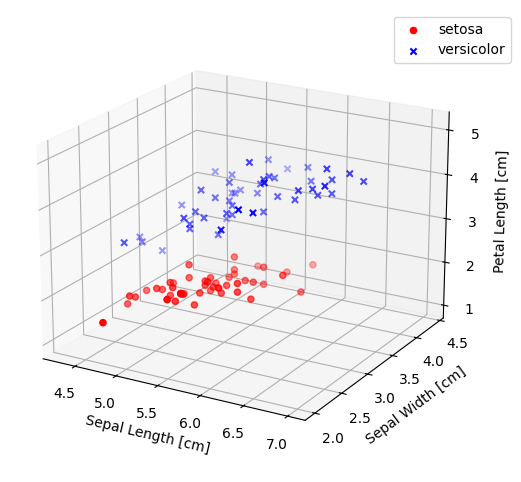

In [149]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample data (Replace X with your actual data)
X = df.iloc[0:100, [0, 1, 2]].values  # sepal length, sepal width, and petal length

# Create a 3D plot with constrained layout
fig = plt.figure(figsize=(8, 6), constrained_layout=False)
ax = fig.add_subplot(111, projection='3d')

# Plotting the first 50 (Setosa) points
ax.scatter(X[:50, 0], X[:50, 1], X[:50, 2], color='red', marker='o', label='setosa')

# Plotting the next 50 (Versicolor) points
ax.scatter(X[50:100, 0], X[50:100, 1], X[50:100, 2], color='blue', marker='x', label='versicolor')

# Labeling axes
ax.set_xlabel('Sepal Length [cm]')
ax.set_ylabel('Sepal Width [cm]')
ax.set_zlabel('Petal Length [cm]')

# Adjust the view angle
ax.view_init(elev=20, azim=-60)

# Adjust the legend position
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1))

plt.show()


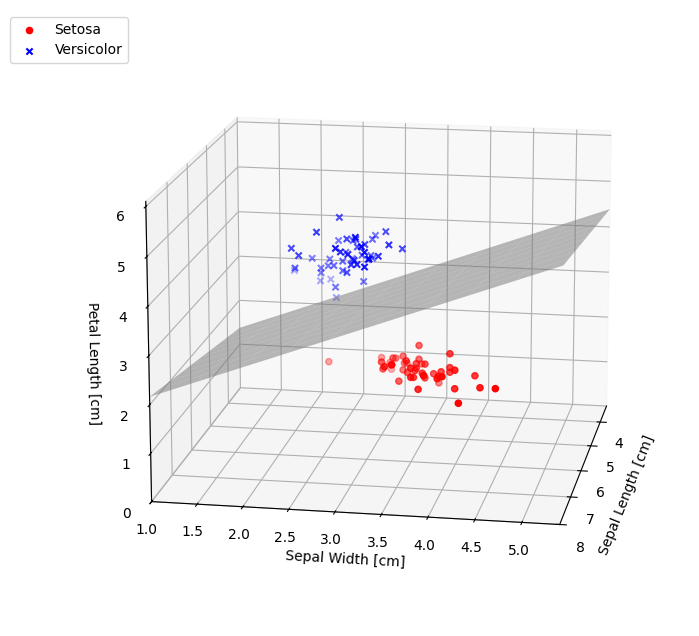

In [151]:
# Train the Perceptron
ppn = Perceptron(eta=0.1, n_iter=40)
ppn.fit(X, y)

# Define ranges for each feature
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # Sepal Length
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Sepal Width
z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1  # Petal Length

# Create a meshgrid for x and y
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 10),
                     np.linspace(y_min, y_max, 10))

# Extract weights
w = ppn.w_

# Calculate zz for the decision boundary plane
if w[3] != 0:
    zz = (-w[0] - w[1] * xx - w[2] * yy) / w[3]
else:
    zz = np.zeros_like(xx)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the decision boundary plane
ax.plot_surface(xx, yy, zz, alpha=0.5, color='gray')

# Plot the data points
ax.scatter(X[y == -1, 0], X[y == -1, 1], X[y == -1, 2],
           color='red', marker='o', label='Setosa')
ax.scatter(X[y == 1, 0], X[y == 1, 1], X[y == 1, 2],
           color='blue', marker='x', label='Versicolor')

# Label axes
ax.set_xlabel('Sepal Length [cm]')
ax.set_ylabel('Sepal Width [cm]')
ax.set_zlabel('Petal Length [cm]')

# Set limits
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_zlim(z_min, z_max)

# Adjust the view angle
ax.view_init(elev=15, azim=10)

# Add legend"
ax.legend(loc='upper right',bbox_to_anchor=(0.1, 1))

plt.show()
